<h2 style="color:blue" align="center"> WTF23 DATA SCIENCE AND ARTIFICAIL INTELLIGENCE </h2>
<h2 style="color:blue" align="center"> GROUP C SUBGROUP 1 </h2>
<h2 style="color:blue" align="center"> CLASSWORK ON LINEAR REGRESSION AND ONE HOT ENCODING</h2>

<h2 style='color:green'>Exercise: One Hot encoding</h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**

<h5 style="color:blue" align="justify">Import libraries </h5>

In [1]:
import pandas as pd
import numpy as np  
import warnings  
  
# For building the model  
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
  
# For data visualization  
import seaborn as sns  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


<h5 style="color:blue" align="Justify">Read data and perform EDA and Data cleaning </h5>
<p>Observing the scatter plot below, it is possible to carryout regression analysis on the data set at three different scenerios. But for the purpose of this exercise, we will restrict our model to 'mileage' and 'car Model'</p>
<p>From the plot, there is a negative linear relationship between the price of the cars and Age i.e as the car ages the price reduces. Hence we can use a linear model to predict</p>

In [3]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'], dtype='object')

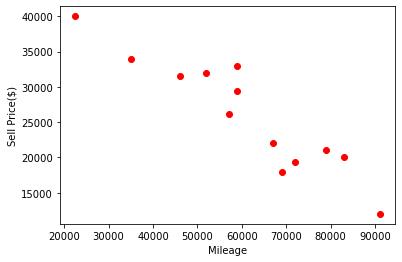

In [4]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'],df['Sell Price($)'],color='red')

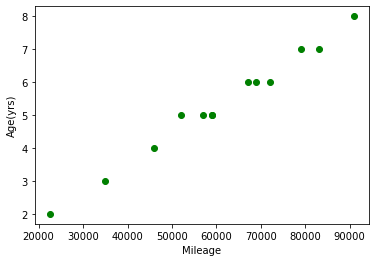

In [5]:
%matplotlib inline
plt.xlabel('Mileage')
plt.ylabel('Age(yrs)')
plt.scatter(df['Mileage'],df['Age(yrs)'],color='green')

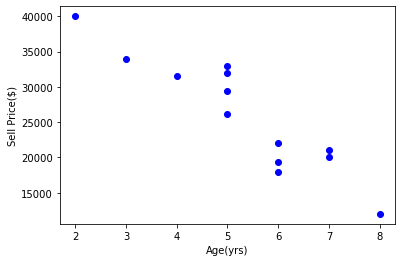

In [6]:
%matplotlib inline
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'],color='blue')

<h2 style='color:purple' align="Justify">Using sklearn OneHotEncoder</h2>
<p> Applying the sklearn onehot label encoder to transform 'Car Model' to numbers. To do this we will perform the follwing:</p>
<p>1. Transform 'Car Model' to numbers</p>
<p>2. Subset the explanatory variables </p>
<p>3. Subset the response variable <p/>
<p>4. Apply the onehotencoder function</p>
<p>5. Perform a fit transformation </p>
<p>6. Perform Linear regression </p>
<p>7. Perform prediction </p>

In [7]:
le = LabelEncoder()

In [8]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [9]:
X = dfle[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [10]:
y = dfle[['Sell Price($)']].values
y

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000]], dtype=int64)

In [11]:
#or
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [12]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [13]:
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [14]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [15]:
model.coef_

array([[-4.28466659e+03,  2.45354074e+03, -3.70122094e-01,
        -1.33245363e+03]])

In [16]:
model.intercept_

array([56523.08523128])

<h4> 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000 </h4>

In [17]:
model.predict([[0,1,45000,4]])

array([[36991.31721062]])

<h4> 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000 </h4>

In [18]:
model.predict([[1,0,86000,7]])

array([[11080.74313219]])

<h4> 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score()) </h4>

In [19]:
model.score(X,y)

0.9417050937281083

<h3 style="color:red" align="justify"> CONCLUSION </h3>

<p> The following are our findings:<p>
<p>1.  The predicted price of a mercedez benz that is 4 yr old with mileage 45000 is 36991.31721062 </p>
<p>2.  The predicted price of a BMW X5 that is 7 yr old with mileage 86000 is 11080.74313219 </p>
<p>3. The model accuracy is about 94% acurate </p>

<h3 style="color:black" align="justify"> CONTRIBUTORS </h3>

[Margaret Oluwadare](margaret.oluwadare@womentechsters.org)

[Loveth Osuagwu](loveth.osuagwu@womentechsters.org)

[Oluchi Okoro (Oluchi Oluchi)](oluchi.oluchi@womentechsters.org)

[Monsurat Onabajo](monsurat.onabajo@womentechsters.org)

[Mariam Anishere](mariam.anishere@womentechsters.org)

[Olubusayo Solola](olubusayo.solola@womentechsters.org)

[Olayemi Ibiloye](olayemi.ibiloye@womentechsters.org)

[Maryann Amaefula](maryann.amaefula@womentechsters.org)

[Olayemi Oloyede](olayemi.oloyede@womentechsters.org)

[Oluwadunsin Olajide](oluwadunsin.olajide@womentechsters.org)
